<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0912_%EC%88%98%EC%83%81%EC%9E%91_%EB%A6%AC%EB%B7%B0_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 난임 환자 대상 임신 성공 여부 예측 AI 온라인 해커톤

https://dacon.io/competitions/official/236452/overview/description

# 1. 대회 배경

 난임 시술은 높은 비용과 스트레스를 초래하므로, 최소한의 시술로 임신 성공 가능성을 높이는 것이 중요함. 따라서 의료기관들은 인공지능을 활용한 임신 성공 여부 예측 모델로 경쟁력을 키우고자 함. 해당 대회에서는 임신 성공에 미치는 최적의 특성을 탐색하는 AI 모델 개발에 초점을 두고 있음. (여기서 임신 성공은 출산까지 성공적으로 진행된 임신을 뜻함)

# 2. 평가 방식

- 리더보드: ROC_AUC로 평가 산식
- Public score: 전체 테스트 데이터 샘플 중 사전 샘플링된 50%
- Private score: 전체 테스트 데이터 샘플 100%

# 3. 데이터 정보

train.csv
- ID : 샘플별 고유 ID (256,351 rows)
- 난임 환자 시술 데이터 (67개의 컬럼)
- 임신 성공 여부
> 1 : 임신 성공
0 : 임신 실패

test.csv
- ID : 샘플별 고유 ID (90,067 rows)
- 난임 환자 시술 데이터 (67개의 컬럼)

sample_submission.csv
- ID : 샘플별 고유 ID
- probability : 예측한 임신 성공 확률

# 4. Data Analysis

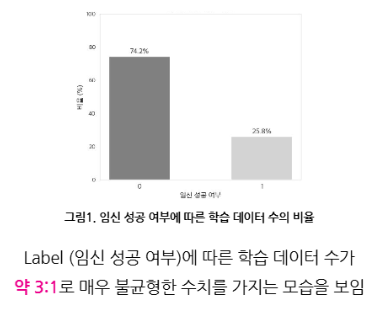

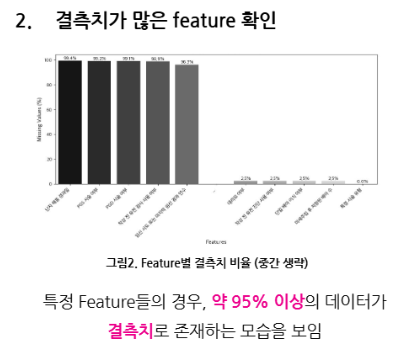

label 데이터의 불균형과 feature들의 결측치를 확인하여 전처리 기준을 세움.

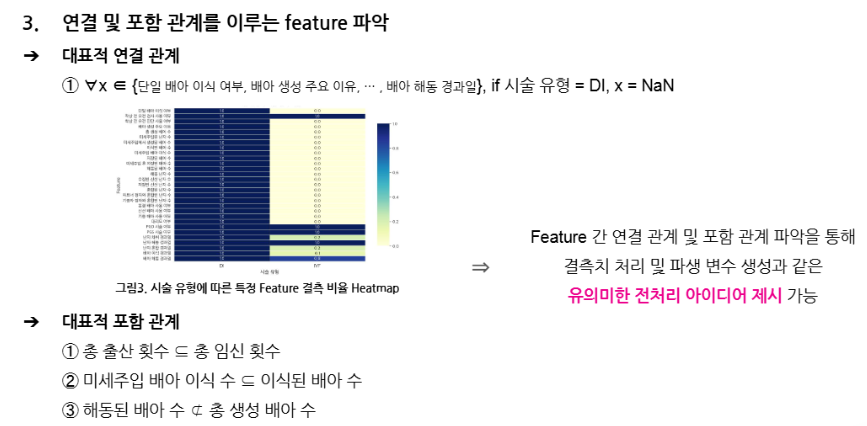

또한 데이터의 연결 및 포함 관계를 파악해서 결측치를 어떻게 처리할지와 더불어 파생 변수 생성 가능성을 제시

이후 도메인 지식을 통해 시술 당시 나이의 중요성과 배아 배양일의 중요성, 환자별 시술 여정에 대한 이해의 중요성을 파악하여 모델 학습에 활용하기 위한 파생변수의 중요성을 파악함.
-> 도메인 정보를 얻은 후 유의미한 정보인지 직접 확인하는 과정을 통해 새로운 전처리 아이디어를 얻고자 함.

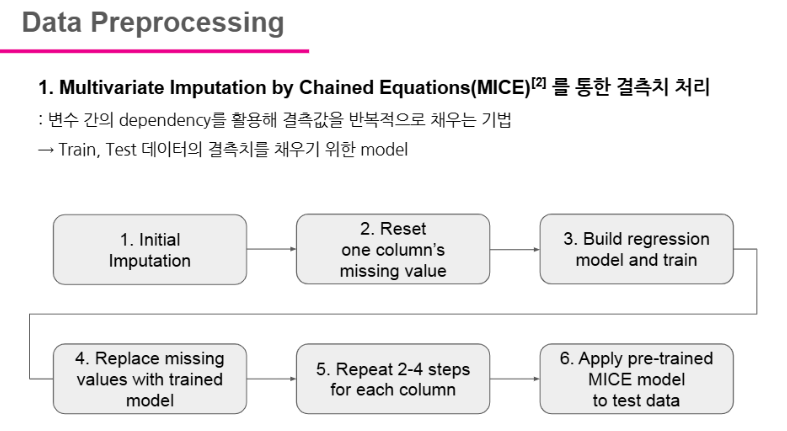

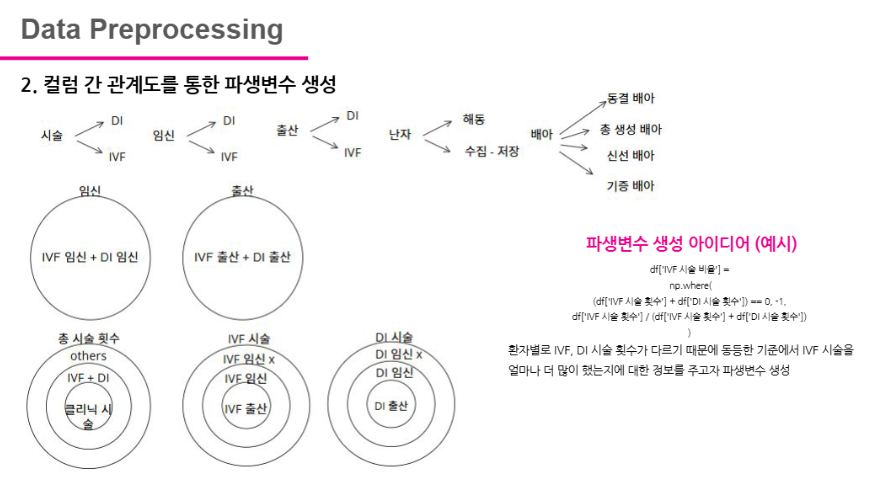

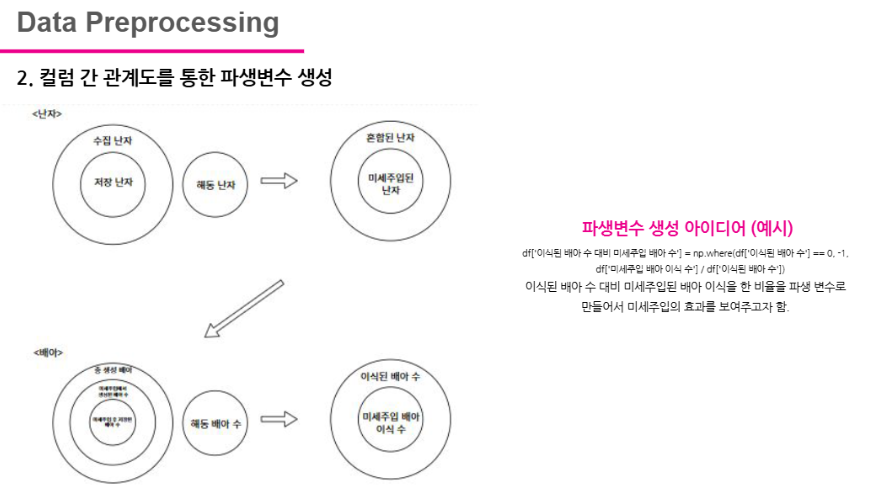

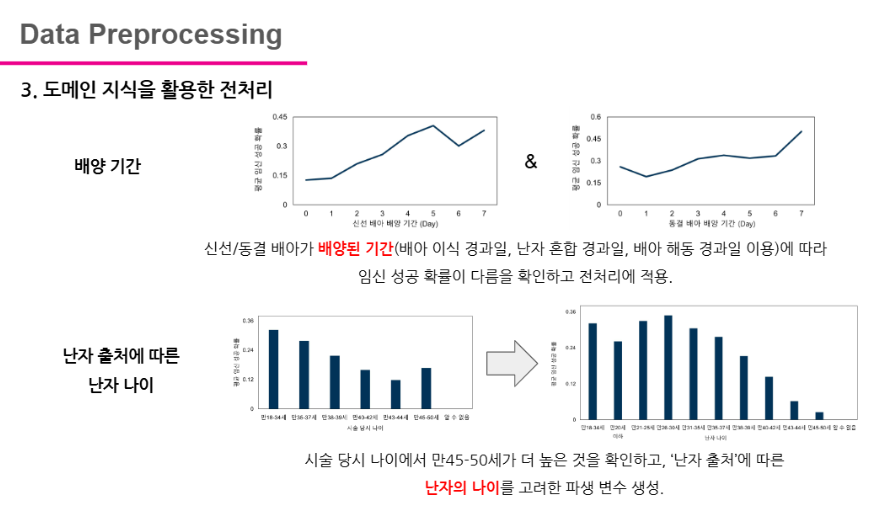

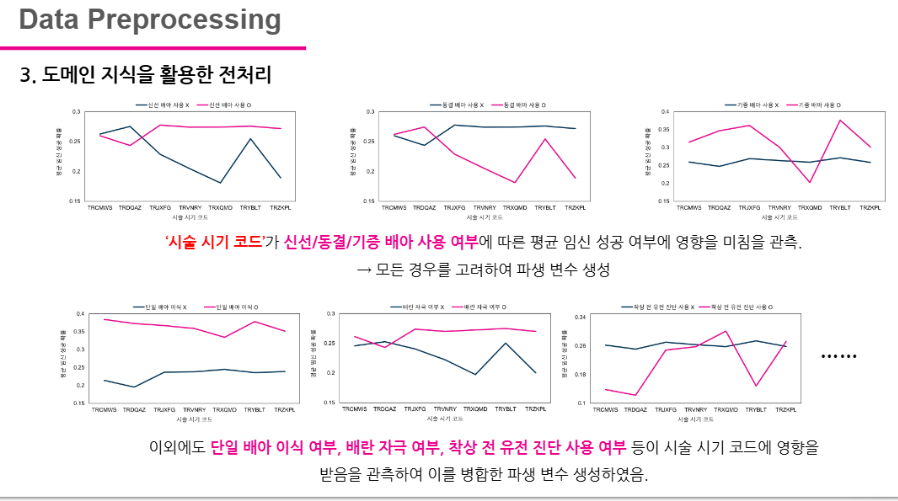

# 5. 모델링

Catboost 모델 활용 (범주형 데이터가 많으며, 범주형 데이터 처리 시 과적합을 막기 위해)
Hyperparameter: Optuna 활용 -> log loss를 최소화하는 방향으로
OOF(Out of fold): 평가 방법 채택
- K-Fold Cross Validation을 사용하여 각 검증 데이터셋에서 나온 예측값을 저장한 결과물
- 각 Fold 별로 학습을 한 뒤 예측한 값들을 앙상블하므로 모델 검증을 동시에 진행 가능.

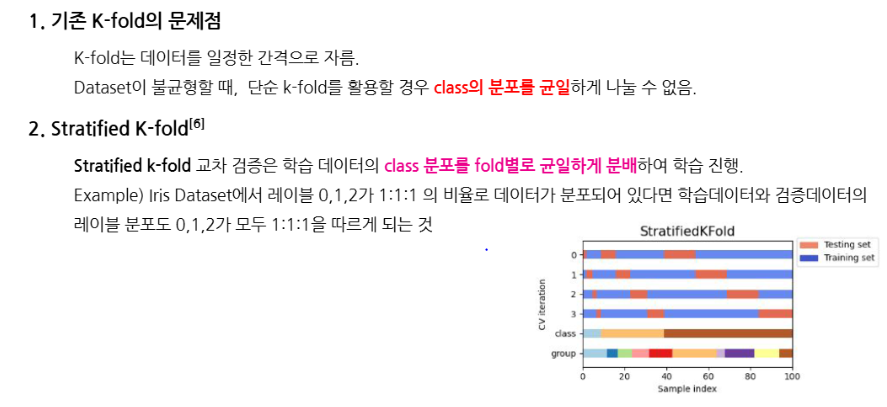

이후 불균형 학습 데이터는 class weight 조절 혹은 smote 기법을 활용하고, 다른 ml 모델을 이용하여 앙상블 모델을 구축하는 것을 시도하면 좋을 듯함

# 배운 점

그동안 변수들 간의 상관관계에만 집중했는데, 서로 연결되거나 포함되는 관계에 놓인 변수들을 파악하고 이를 이용하여 결측치를 채우는 방식에 대해서도 생각해 보게 되었다. 또, 지난 프로젝트에서 파생변수를 만드는 데 어려움을 겪었는데, 도메인 지식을 적극 활용하는 게 변수 생성에 도움이 된다는 것을 깨달았다.